<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Estimated_total_number_of_deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
deaths_raw = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/total_deaths.csv",\
                         index_col='date')
deaths_raw = deaths_raw.fillna(method='pad')
deaths_raw = deaths_raw.fillna(0)

In [0]:
# Tipping point deaths
TP_deaths = 10

In [0]:
list_countries = ["China", "France", "Italy", "United Kingdom", "United States"]

In [0]:
deaths = {}
for country in list_countries:
  deaths[country] = deaths_raw[country][deaths_raw[country] > TP_deaths]

In [0]:
growth_rate_deaths = {}
for country in list_countries:
  aux = deaths[country]
  growth_rate_deaths[country] = [t/s for s, t in zip(aux, aux[1:]) if s is not 0]

In [0]:
# Window size deaths
WS_deaths = 3

In [0]:
rolling_deaths_mean = pd.Series()
for country in list_countries:
  grd = pd.Series(growth_rate_deaths[country])
  rolling_grd = grd.rolling(window=WS_deaths)
  rolling_deaths_mean[country] = rolling_grd.mean()

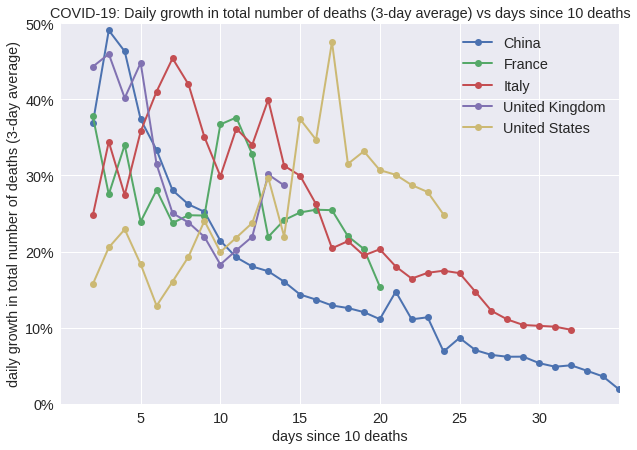

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
for country in list_countries:
  ax.plot(rolling_deaths_mean[country], label=country, linewidth=2, marker='o')

ax.set_xticks(np.arange(5,len(rolling_deaths_mean["Italy"]),5))
ax.set_xticklabels(np.arange(5,len(rolling_deaths_mean["Italy"]),5), fontsize='x-large')
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%'], fontsize='x-large')
plt.title(f"COVID-19: Daily growth in total number of deaths ({WS_deaths}-day average) vs days since {TP_deaths} deaths", fontsize='x-large')
plt.xlabel(f"days since {TP_deaths} deaths", fontsize='x-large')
plt.ylabel(f"daily growth in total number of deaths ({WS_deaths}-day average)", fontsize='x-large')
plt.legend(fontsize='x-large')
plt.ylim(1.0,1.5)
plt.xlim(0,35)
plt.show()

In [12]:
rolling_deaths_mean["United States"][-1:]

24    1.248602
dtype: float64

In [13]:
rolling_deaths_mean["China"][7:12]

7     1.280601
8     1.262034
9     1.252261
10    1.214216
11    1.192403
dtype: float64

In [0]:
# Closest to China's plot
aux_US = rolling_deaths_mean["China"][10:]

In [0]:
future_deaths_US = pd.Series()
future_deaths_US[pd.to_datetime(deaths["United States"].tail(1).keys()[0]).strftime('%Y-%m-%d')] = deaths["United States"].tail(1).iloc[0]
for i in np.arange(len(aux)):
  future_deaths_US[(pd.to_datetime(deaths["United States"].tail(1).keys()[0]) + pd.DateOffset(i+1)).strftime('%Y-%m-%d')] = future_deaths_US.iloc[i]*aux_US.iloc[i]

In [0]:
future_deaths_US = future_deaths_US[1:]

In [0]:
future_deaths_US = future_deaths_US.astype(int)

In [17]:
deaths["United States"].tail(3)

date
2020-03-28    1707
2020-03-29    2191
2020-03-30    2509
Name: United States, dtype: int64

In [20]:
future_deaths_US.head(3)

2020-03-31    3046
2020-04-01    3632
2020-04-02    4288
dtype: int64

In [32]:
3046-2509, 3632-3046

(537, 586)

In [0]:
aux_new_deaths = [t-s for s, t in zip(deaths["United States"], deaths["United States"][1:]) if s is not 0]

In [58]:
deaths_raw["United States"][deaths_raw["United States"]>1][:10]

date
2020-03-02     2
2020-03-03     6
2020-03-04     9
2020-03-05    11
2020-03-06    12
2020-03-07    14
2020-03-08    17
2020-03-09    21
2020-03-10    26
2020-03-11    28
Name: United States, dtype: int64

In [0]:
aux_new_deaths = [2] + aux_new_deaths

In [56]:
aux_new_deaths[:3]

[2, 1, 2]

In [57]:
aux_new_deaths[-3:]

[411, 484, 318]

In [0]:
new_deaths_US = pd.Series()
for i in np.arange(len(aux_new_deaths)):
  new_deaths_US[(pd.to_datetime(deaths["United States"].keys()[0]) + pd.DateOffset(i)).strftime('%Y-%m-%d')] = aux_new_deaths[i]

In [62]:
new_deaths_US

2020-03-05      2
2020-03-06      1
2020-03-07      2
2020-03-08      3
2020-03-09      4
2020-03-10      5
2020-03-11      2
2020-03-12      2
2020-03-13     10
2020-03-14      7
2020-03-15     10
2020-03-16     12
2020-03-17     16
2020-03-18     23
2020-03-19     42
2020-03-20      0
2020-03-21    110
2020-03-22     80
2020-03-23    131
2020-03-24    119
2020-03-25    211
2020-03-26    249
2020-03-27    246
2020-03-28    411
2020-03-29    484
2020-03-30    318
dtype: int64

In [28]:
new_deaths_US.tail(3)

2020-03-28    411
2020-03-29    484
2020-03-30    318
dtype: int64

In [0]:
aux_new_deaths_future = [t-s for s, t in zip(future_deaths_US, future_deaths_US[1:]) if s is not 0]

In [30]:
aux_new_deaths_future[:3]

[586, 656, 746]

In [0]:
aux_new_deaths_future = [537] + aux_new_deaths_future

In [34]:
aux_new_deaths_future[:5]

[537, 586, 656, 746, 808]

In [35]:
aux_deaths.keys()[-1]

NameError: ignored

In [36]:
deaths["United States"].keys()[-1]

'2020-03-30'

In [39]:
new_deaths_US.tail(3)

2020-03-28    411
2020-03-29    484
2020-03-30    318
dtype: int64

In [0]:
new_deaths_future = pd.Series()
for i in np.arange(len(aux_new_deaths_future)):
  new_deaths_future[(pd.to_datetime(deaths["United States"].keys()[-1]) + pd.DateOffset(i+1)).strftime('%Y-%m-%d')] = aux_new_deaths_future[i]

In [42]:
new_deaths_US.tail(3)

2020-03-28    411
2020-03-29    484
2020-03-30    318
dtype: int64

In [41]:
new_deaths_future.head(3)

2020-03-31    537
2020-04-01    586
2020-04-02    656
dtype: int64

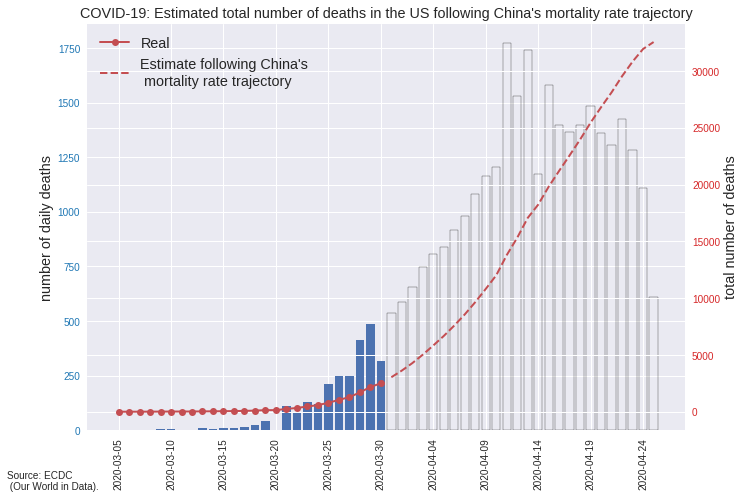

In [64]:
fig, ax1 = plt.subplots(figsize=(10,7))

color = 'tab:blue'
ax1.bar(new_deaths_US.keys(), new_deaths_US.values, color = 'C0')
ax1.bar(new_deaths_future.keys(), new_deaths_future.values, color = 'C0', fill=False)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_ylabel('number of daily deaths', fontsize='x-large')

ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(deaths["United States"], linewidth=2, color='C2', label='Real', marker='o')
ax2.plot(future_deaths_US, linewidth=2, color='C2', label="Estimate following China's\n mortality rate trajectory", linestyle='dashed')
ax2.set_xticks(np.arange(0, len(deaths['United States'])+len(future_deaths_US), 5))


ax2.tick_params(axis='y', labelcolor=color)


ax2.set_title("COVID-19: Estimated total number of deaths in the US following China's mortality rate trajectory", fontsize='x-large')
ax2.set_xlabel('date (year-month-day)', fontsize='x-large')
ax2.set_ylabel('total number of deaths', fontsize='x-large')
ax2.legend(fontsize='x-large')

fig.tight_layout()
plt.annotate('Source: ECDC\n (Our World in Data).', (0,0), (-80,-40), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')
plt.xticks(rotation=90)
plt.savefig("2020-03-30-Estimated-US.png", format='png', dvi=500)

In [0]:
from google.colab import files
files.download("2020-03-30-Estimated-US.png")

In [0]:
# Closest to China's plot
aux_UK = rolling_deaths_mean["China"][7:]

In [0]:
future_deaths_UK = pd.Series()
future_deaths_UK[pd.to_datetime(deaths["United Kingdom"].tail(1).keys()[0])] = deaths["United Kingdom"].tail(1).iloc[0]
for i in np.arange(len(aux)):
  future_deaths_UK[(pd.to_datetime(deaths["United Kingdom"].tail(1).keys()[0]) + pd.DateOffset(i+1)).strftime('%Y-%m-%d')] = future_deaths_UK.iloc[i]*aux_UK.iloc[i]

In [12]:
future_deaths_UK

2020-03-30 00:00:00     1228.000000
2020-03-31              1572.578348
2020-04-01              1984.647858
2020-04-02              2485.296719
2020-04-03              3017.687696
                           ...     
2020-05-26             39132.515450
2020-05-27             39192.024824
2020-05-28             39247.591110
2020-05-29             39299.171694
2020-05-30             39350.741854
Length: 62, dtype: float64

In [0]:
aux = rolling_deaths_mean["China"][25:]

In [14]:
pd.to_datetime(deaths["Italy"].tail(1).keys()[0]).strftime('%Y-%m-%d')

'2020-03-30'

In [0]:
future_deaths_IT = pd.Series()
future_deaths_IT[pd.to_datetime(deaths["Italy"].tail(1).keys()[0]).strftime('%Y-%m-%d')] = deaths["Italy"].tail(1).iloc[0]
for i in np.arange(len(aux)):
  future_deaths_IT[(pd.to_datetime(deaths["Italy"].tail(1).keys()[0]) + pd.DateOffset(i+1)).strftime('%Y-%m-%d')] = future_deaths_IT.iloc[i]*aux.iloc[i]

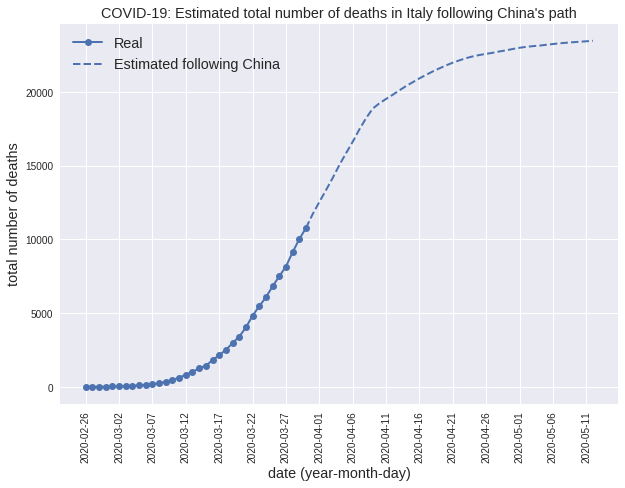

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(deaths["Italy"], linewidth=2, color='C0', label='Real', marker='o')
plt.plot(future_deaths_IT, linewidth=2, color='C0', label='Estimated following China', linestyle='dashed')
plt.xticks(rotation=90)
ax.set_xticks(np.arange(0, len(deaths['Italy'])+len(future_deaths_IT), 5))
ax.set_title("COVID-19: Estimated total number of deaths in Italy following China's path", fontsize='x-large')
ax.set_xlabel('date (year-month-day)', fontsize='x-large')
ax.set_ylabel('total number of deaths', fontsize='x-large')
ax.legend(fontsize='x-large')
plt.savefig("2020-03-30-Estimated-Italy.png", format='png', dvi=500)

In [0]:
from google.colab import files
files.download("2020-03-30-Estimated-Italy.png")

In [0]:
# Closest to China's plot
aux_FR = rolling_deaths_mean["China"][11:]

In [0]:
future_deaths_FR = pd.Series()
future_deaths_FR[pd.to_datetime(deaths["France"].tail(1).keys()[0]).strftime('%Y-%m-%d')] = deaths["France"].tail(1).iloc[0]
for i in np.arange(len(aux)):
  future_deaths_FR[(pd.to_datetime(deaths["France"].tail(1).keys()[0]) + pd.DateOffset(i+1)).strftime('%Y-%m-%d')] = future_deaths_FR.iloc[i]*aux_FR.iloc[i]

In [20]:
future_deaths_FR

2020-03-30     2606.000000
2020-03-31     3107.401015
2020-04-01     3668.080334
2020-04-02     4306.919293
2020-04-03     4997.930674
2020-04-04     5715.473026
2020-04-05     6498.077386
2020-04-06     7337.496154
2020-04-07     8260.954725
2020-04-08     9256.036869
2020-04-09    10285.458035
2020-04-10    11801.526414
2020-04-11    13111.057890
2020-04-12    14601.602748
2020-04-13    15605.350653
2020-04-14    16956.509856
2020-04-15    18152.153109
2020-04-16    19318.323058
2020-04-17    20512.737511
2020-04-18    21783.218465
2020-04-19    22946.017340
2020-04-20    24063.641434
2020-04-21    25281.336496
2020-04-22    26377.535900
2020-04-23    27325.692608
2020-04-24    27846.344367
2020-04-25    28275.261969
2020-04-26    28685.655924
2020-04-27    29117.912045
2020-04-28    29543.099652
2020-04-29    29916.745019
2020-04-30    30297.334149
2020-05-01    30640.028244
2020-05-02    30976.100078
2020-05-03    31281.154733
2020-05-04    31572.497354
2020-05-05    31839.908351
2

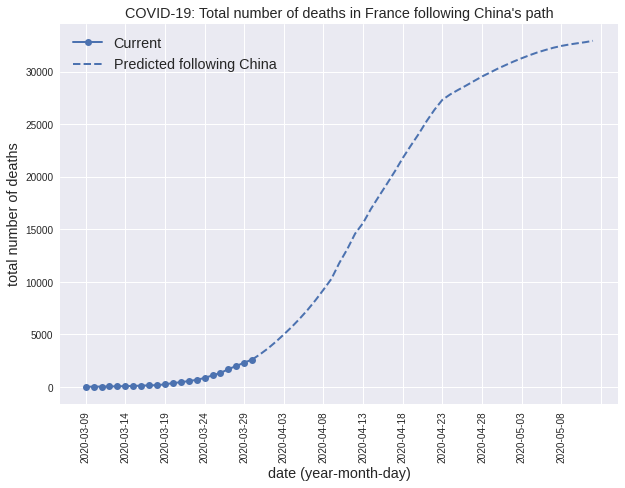

In [21]:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(deaths["France"], linewidth=2, color='C0', label='Current', marker='o')
plt.plot(future_deaths_FR, linewidth=2, color='C0', label='Predicted following China', linestyle='dashed')
plt.xticks(rotation=90)
ax.set_xticks(np.arange(0, len(deaths['France'])+len(future_deaths_FR), 5))
ax.set_title("COVID-19: Total number of deaths in France following China's path", fontsize='x-large')
ax.set_xlabel('date (year-month-day)', fontsize='x-large')
ax.set_ylabel('total number of deaths', fontsize='x-large')
ax.legend(fontsize='x-large')
plt.show()